This notebook is dedicated to analysis of CorovaVirus (COVID-19) outbreak data. The notebook covers Azerbaijan case study. Analysis includes visualizations and predictions. Data are provided by John Hopkins University - https://github.com/CSSEGISandData/COVID-19

In [1]:
# import reuqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime

In [2]:
# get data from https://github.com/CSSEGISandData/COVID-19, provided by Johns Hopkins University

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Let's create a separate dataframe for Azerbaijan

In [3]:
# extracting confirmed count for Azerbaijan
confirmed_AZE = confirmed[confirmed['Country/Region']=='Azerbaijan'] \
    .drop(columns=['Province/State', 'Lat', 'Long' ], axis=1) \
    .iloc[:, 1:] \
    .T
confirmed_AZE = confirmed_AZE.loc['3/31/20':]
date_index = pd.DatetimeIndex(confirmed_AZE.index)
confirmed_AZE.set_index(date_index, inplace=True)
# confirmed_AZE.head()

In [4]:
# extracting recovery count for Azerbaijan

recoveries_AZE = recoveries[recoveries['Country/Region']=='Azerbaijan'] \
    .drop(columns=['Province/State', 'Lat', 'Long' ], axis=1) \
    .iloc[:, 1:] \
    .T
recoveries_AZE = recoveries_AZE.loc['3/31/20':]
date_index = pd.DatetimeIndex(recoveries_AZE.index)
recoveries_AZE.set_index(date_index, inplace=True)
# recoveries_AZE.head()

In [5]:
# extracting death count for Azerbaijan

deaths_AZE = deaths[deaths['Country/Region']=='Azerbaijan'] \
    .drop(columns=['Province/State', 'Lat', 'Long' ], axis=1) \
    .iloc[:, 1:] \
    .T
deaths_AZE = deaths_AZE.loc['3/31/20':]
date_index = pd.DatetimeIndex(deaths_AZE.index)
deaths_AZE.set_index(date_index, inplace=True)
# deaths_AZE.head()

In [6]:
AZE_full = pd.concat([confirmed_AZE, recoveries_AZE, deaths_AZE], axis=1)
AZE_full.columns = ['confirmed', 'recovery', 'death']
AZE_full['active'] = AZE_full.confirmed - AZE_full.recovery - AZE_full.death
AZE_full['confirmed_daily'] = AZE_full.confirmed.diff()
AZE_full['recovery_daily'] = AZE_full.recovery.diff()
AZE_full['death_daily'] = AZE_full.death.diff()
AZE_full['active_daily'] = AZE_full.active.diff()
AZE_full['net_active'] = AZE_full.confirmed_daily - (AZE_full.recovery_daily + AZE_full.death_daily)
AZE_full[AZE_full.columns[4:]] = AZE_full[AZE_full.columns[4:]].fillna(0.0).astype(int)

AZE_full = AZE_full[1:]
AZE_full.head()

,confirmed,recovery,death,active,confirmed_daily,recovery_daily,death_daily,active_daily,net_active
2020-04-01,359,26,5,328,61,0,0,61,61
2020-04-02,400,26,5,369,41,0,0,41,41
2020-04-03,443,32,5,406,43,6,0,37,37
2020-04-04,521,32,5,484,78,0,0,78,78
2020-04-05,584,32,7,545,63,0,2,61,61


We are primarily interested in trend of Active count. Below we can see daily net change in Active count.

C:\Users\Anar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys
C:\Users\Anar\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


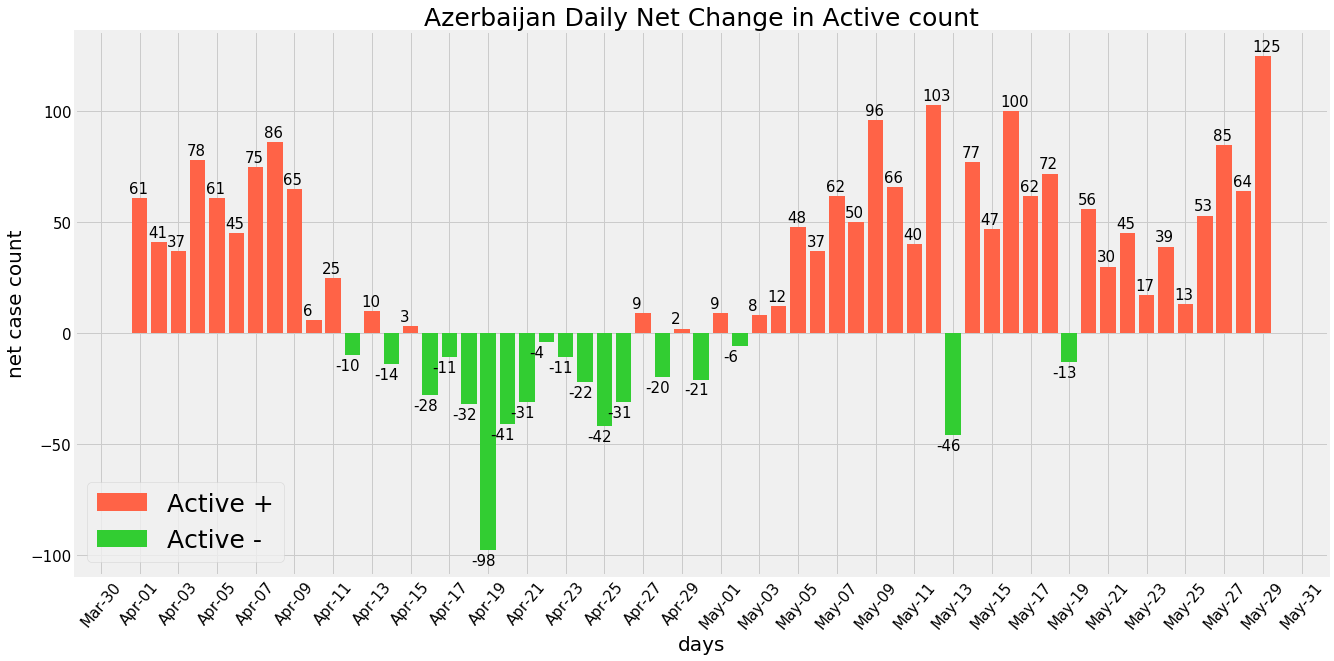

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Azerbaijan Daily Net Change in Active count', size=25)

active_plus = AZE_full.net_active.where(AZE_full.net_active > 0, np.nan)
active_plus_bars = ax.bar(active_plus.index, active_plus, label='Active +', color='tomato')
for i in np.arange(len(AZE_full)):
    ax.annotate(active_plus_bars[i].get_height().astype('Int64'),
    xy=(active_plus_bars[i].get_x() + active_plus_bars[i].get_width()/20, active_plus_bars[i].get_height()),  
    xytext=(-4, 5), textcoords="offset points", size=15)

active_minus = AZE_full.net_active.where(AZE_full.net_active < 0, np.nan)
active_minus_bars = ax.bar(active_minus.index, active_minus, label='Active -', color='limegreen')
for i in np.arange(len(AZE_full)):
    ax.annotate(active_minus_bars[i].get_height().astype('Int64'),
    xy=(active_minus_bars[i].get_x() + active_minus_bars[i].get_width()/20, active_minus_bars[i].get_height()),
    xytext=(-10,-15), textcoords="offset points", size=15)    
    
ax.set_ylabel('net case count', size=20)
ax.set_xlabel('days', size=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15, rotation=50)

ax.legend(fontsize=25)

plt.savefig("AZE_net_active_daily_case")

As we can see situation was stabilizing in second half of April, though it again started to worsening in May. The most decrease in Active case count was on April 19 (98) and the most increase was on May 29th (125)